<a href="https://colab.research.google.com/github/sbbwoy/ESAA/blob/main/220527_Ch9_Recommendations_exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 06 아이템 기반 최근접 이웃 협업 필터링 실습

In [2]:
import pandas as pd
import numpy as np

In [ ]:
movies = pd.read_csv('/content/movies.csv')
ratings = pd.read_csv('/content/ratings.csv')
print(movies.shape)
print(ratings.shape)

(9742, 3)
(100836, 4)


In [ ]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


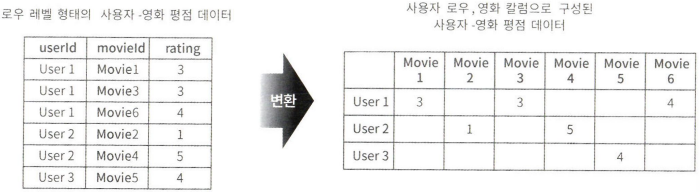

In [ ]:
ratings = ratings[['userId', 'movieId', 'rating']]
ratings_matrix = ratings.pivot_table('rating', index = 'userId', columns = 'movieId')
ratings_matrix.head(3)

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* 최소 평점이 0.5 이므로 NaN 값은 모두 0으로 변환

In [ ]:
#title 칼럼을 얻기 위해 moives와 조인
rating_movies = pd.merge(ratings, movies, on='movieId')

#columns = 'title'로 title 칼럼으로 피벗 수행
ratings_matrix = rating_movies.pivot_table('rating', index = 'userId', columns = 'title')

#NaN 값을 모두 0으로 변환
ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###영화 간 유사도 산출

- 영화를 기준으로 cosine_similarity()를 적용하기 위해선 현재의 ratings_matrix가 행 기준이 영화가 되어야 함 -> 행렬 전치

In [ ]:
ratings_matrix_T = ratings_matrix.transpose()
ratings_matrix_T.head(3)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

item_sim = cosine_similarity(ratings_matrix_T, ratings_matrix_T)

#cosine_similarity()로 반환된 넘파이 행렬을 영화명으로 매핑해 df로 변환
item_sim_df = pd.DataFrame(data = item_sim, index=ratings_matrix.columns, columns = ratings_matrix.columns)

print(item_sim_df.shape)
item_sim_df.head(3)

(9719, 9719)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.141653,0.0,...,0.0,0.342055,0.543305,0.707107,0.0,0.0,0.139431,0.327327,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.000000,0.707107,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Round Midnight (1986),0.0,0.707107,1.000000,0.0,0.0,0.0,0.176777,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [ ]:
item_sim_df['Godfather, The (1972)'].sort_values(ascending=False)[:6]

title
Godfather, The (1972)                        1.000000
Godfather: Part II, The (1974)               0.821773
Goodfellas (1990)                            0.664841
One Flew Over the Cuckoo's Nest (1975)       0.620536
Star Wars: Episode IV - A New Hope (1977)    0.595317
Fargo (1996)                                 0.588614
Name: Godfather, The (1972), dtype: float64

In [ ]:
item_sim_df['Inception (2010)'].sort_values(ascending=False)[1:6]

title
Dark Knight, The (2008)          0.727263
Inglourious Basterds (2009)      0.646103
Shutter Island (2010)            0.617736
Dark Knight Rises, The (2012)    0.617504
Fight Club (1999)                0.615417
Name: Inception (2010), dtype: float64

###아이템 기반 최근접 이웃 협업 필터링으로 개인화된 영화추천

예측 평점

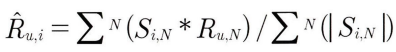

- R_(u, i): 사용자 u, 아이템 i의 개인화된 예측 평점 값
- S_(i, N): 아이템i와 가장 유사도가 높은 Top-N개 아이템의 유사도 벡터
- R_(u, N): 사용자 u의 아이템 i와 가장 유사도가 높은 Top-N개 아이템에 대한 실제 평점 벡터

In [ ]:
def predict_rating(ratings_arr, item_sim_arr):
    ratings_pred = ratings_arr.dot(item_sim_arr)/np.array([np.abs(item_sim_arr).sum(axis=1)])
    return ratings_pred

In [ ]:
ratings_pred = predict_rating(ratings_matrix.values, item_sim_df.values)
ratings_pred_matrix = pd.DataFrame(data = ratings_pred, index = ratings_matrix.index, columns = ratings_matrix.columns)
ratings_pred_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.070345,0.577855,0.321696,0.227055,0.206958,0.194615,0.249883,0.102542,0.157084,0.178197,...,0.113608,0.181738,0.133962,0.128574,0.006179,0.212070,0.192921,0.136024,0.292955,0.720347
2,0.018260,0.042744,0.018861,0.000000,0.000000,0.035995,0.013413,0.002314,0.032213,0.014863,...,0.015640,0.020855,0.020119,0.015745,0.049983,0.014876,0.021616,0.024528,0.017563,0.000000
3,0.011884,0.030279,0.064437,0.003762,0.003749,0.002722,0.014625,0.002085,0.005666,0.006272,...,0.006923,0.011665,0.011800,0.012225,0.000000,0.008194,0.007017,0.009229,0.010420,0.084501


In [5]:
from sklearn.metrics import mean_squared_error

#사용자가 평점을 부여한 영화에 대해서만 예측 성능 평가 MSE를 구함
def get_mse(pred, actual):
    #평점이 있는 실제 영화만 추출
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

In [ ]:
print('아이템 기반 모든 최근접 이웃 MSE: ', get_mse(ratings_pred, ratings_matrix.values))

아이템 기반 모든 최근접 이웃 MSE:  9.895354759094706


In [8]:
def predict_rating_topsim(ratings_arr, item_sim_arr, n = 20):
    #사용자-아이템 평점 행렬 크기만큼 0으로 채운 예측 행렬 초기화
    pred = np.zeros(ratings_arr.shape)

    #사용자-아이템 평점 행렬의 열 크기만큼 루프 수행
    for col in range(ratings_arr.shape[1]):
        #유사도 행렬에서 유사도가 큰 순으로 n개 데이터 행렬의 인덱스 반환
        top_n_items = [np.argsort(item_sim_arr[:, col])[:-n-1:-1]]
        #개인화된 예측 평점 계산
        for row in range(ratings_arr.shape[0]):
            pred[row, col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row, :][top_n_items].T)
            pred[row, col] /= np.sum(np.abs(item_sim_arr[col, :][top_n_items]))

    return pred

In [ ]:
ratings_pred = predict_rating_topsim(ratings_matrix.values, item_sim_df.values, n=20)
print('아이템 기반 최근접 TOP-20 이웃 MSE: ', get_mse(ratings_pred, ratings_matrix.values))

#계산된 예측 평점 데이터는 df로 재생성
ratings_pred_matirx = pd.DataFrame(data = ratings_pred, index = ratings_matrix.index, columns = ratings_matrix.columns)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':


아이템 기반 최근접 TOP-20 이웃 MSE:  3.6949827608772314


* mse가 약 3.69로 기존 9.89보다 향상됨

In [ ]:
user_rating_id = ratings_matrix.loc[9, :]
user_rating_id[user_rating_id > 0].sort_values(ascending=False)[:10]

title
Adaptation (2002)                                                                 5.0
Citizen Kane (1941)                                                               5.0
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    5.0
Producers, The (1968)                                                             5.0
Lord of the Rings: The Two Towers, The (2002)                                     5.0
Lord of the Rings: The Fellowship of the Ring, The (2001)                         5.0
Back to the Future (1985)                                                         5.0
Austin Powers in Goldmember (2002)                                                5.0
Minority Report (2002)                                                            4.0
Witness (1985)                                                                    4.0
Name: 9, dtype: float64

In [9]:
def get_unseen_movies(ratings_matrix, userId):
    #userId로 입력받은 사용자의 모든 영화 정보를 추출해 Series로 반환함
    #반환된 user_rating은 영화명(title)을 인덱스로 가지는 series 객체임
    user_rating = ratings_matrix.loc[userId, :]

    #user_rating이 0보다 크면 기존에 관람한 영화. 대상 인덱스를 추출해 list 객체로 만듦
    already_seen = user_rating[user_rating > 0].index.tolist()

    #모든 영화명을 list 객체로 만듦
    movies_list = ratings_matrix.columns.tolist()

    #list comprehension으로 already_seen에 해당하는 영화는 movies_list에서 제외함
    unseen_list = [movie for movie in movies_list if movie not in already_seen]

    return unseen_list

In [10]:
def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
    #예측 평점 DateFrame에서 사용자 id 인덱스와 unseen_list로 들어온 영화명 칼럼을 추출 후
    #가장 예측 평점이 높은 순으로 정렬
    recomm_movies = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm_movies

In [ ]:
#사용자가 관람하지 않는 영화 추출
unseen_list = get_unseen_movies(ratings_matrix, 9)

#아이템 기반 최근접 이웃 협업 필터링으로 영화 추천
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)

#평점 데이터를 df로 생성
recomm_movies = pd.DataFrame(data=recomm_movies.values, index=recomm_movies.index, columns = ['pred_score'])
recomm_movies

,pred_score
title,
Venom (1982),0.303278
Dr. Goldfoot and the Bikini Machine (1965),0.258705
Frankie and Johnny (1966),0.234754
English Vinglish (2012),0.214774
"Harmonists, The (1997)",0.169338
"Passenger, The (Professione: reporter) (1975)",0.163884
"Marriage of Maria Braun, The (Ehe der Maria Braun, Die) (1979)",0.163884
"Child, The (L'enfant) (2005)",0.163884
3:10 to Yuma (1957),0.163884


##07 행렬 분해를 이용한 잠재요인 협업 필터링 실습

In [11]:
def get_rmse(R, P, Q, non_zeros):
    error = 0
    # 두개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)
    
    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출하여 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
      
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    
    return rmse

In [7]:
def matrix_factorization(R, K, steps = 200, learning_rate = 0.01, r_lambda = 0.01):
    num_users, num_items = R.shape
    # P와 Q 매트릭스의 크기를 지정하고 정규 분포를 따르는 랜덤 값 입력
    np.random.seed(1)
    P = np.random.normal(scale = 1./K, size = (num_users, K))
    Q = np.random.normal(scale = 1./K, size = (num_items, K))

    prev_rmse = 10000
    break_count = 0

    #R > 0인 행 위치, 열 위치, 값을 non_zeros 리스트 객체에 저장
    non_zeros = [(i, j, R[i, j]) for i in range(num_users) for j in range(num_items) if R[i, j] > 0]

    #SGD기법으로 P와 Q 매트릭스를 계속 업데이ㅡ
    for step in range(steps):
        for i, j, r in non_zeros:
            #실제값과 예측값의 차이인 오류값 구함
            eij = r - np.dot(P[i, :], Q[j, :].T)
            #Regularization을 반영한 SGD 업데이트 공식 적용
            P[i, :] = P[i, :] + learning_rate * (eij * Q[j, :] - r_lambda*P[i, :])
            Q[j, :] = Q[j, :] + learning_rate * (eij * P[i, :] - r_lambda*Q[j, :])

        rmse = get_rmse(R, P, Q, non_zeros)
        if (step % 10) == 0:
            print('### iteration step: ', step, ' rmse: ', rmse)

    return P, Q

In [3]:
movies = pd.read_csv('/content/movies.csv')
ratings = pd.read_csv('/content/ratings.csv')

ratings = ratings[['userId', 'movieId', 'rating']]
ratings_matrix = ratings.pivot_table('rating', index = 'userId', columns = 'movieId')

#title 칼럼을 얻기 위해 movies와 조인
rating_movies = pd.merge(ratings, movies, on='movieId')
#columns = 'tktle'로 title 칼럼으로 pivot 수행
ratings_matrix = rating_movies.pivot_table('rating', index = 'userId', columns = 'title')

In [12]:
P, Q = matrix_factorization(ratings_matrix.values, K = 50, steps = 200, learning_rate = 0.01, r_lambda = 0.01)
pred_matrix = np.dot(P ,Q.T)

### iteration step:  0  rmse:  2.9023619751336867
### iteration step:  10  rmse:  0.7335768591017927
### iteration step:  20  rmse:  0.5115539026853442
### iteration step:  30  rmse:  0.37261628282537446
### iteration step:  40  rmse:  0.2960818299181014
### iteration step:  50  rmse:  0.2520353192341642
### iteration step:  60  rmse:  0.22487503275269854
### iteration step:  70  rmse:  0.2068545530233154
### iteration step:  80  rmse:  0.19413418783028685
### iteration step:  90  rmse:  0.18470082002720403
### iteration step:  100  rmse:  0.17742927527209104
### iteration step:  110  rmse:  0.17165226964707492
### iteration step:  120  rmse:  0.16695181946871723
### iteration step:  130  rmse:  0.16305292191997545
### iteration step:  140  rmse:  0.15976691929679646
### iteration step:  150  rmse:  0.1569598699945732
### iteration step:  160  rmse:  0.1545339818671543
### iteration step:  170  rmse:  0.15241618551077643
### iteration step:  180  rmse:  0.1505508073962831
### iteration

In [13]:
ratings_pred_matrix = pd.DataFrame(data = pred_matrix, index = ratings_matrix.index, columns = ratings_matrix.columns)
ratings_pred_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,3.055084,4.092018,3.564130,4.502167,3.981215,1.271694,3.603274,2.333266,5.091749,3.972454,...,1.402608,4.208382,3.705957,2.720514,2.787331,3.475076,3.253458,2.161087,4.010495,0.859474
2,3.170119,3.657992,3.308707,4.166521,4.311890,1.275469,4.237972,1.900366,3.392859,3.647421,...,0.973811,3.528264,3.361532,2.672535,2.404456,4.232789,2.911602,1.634576,4.135735,0.725684
3,2.307073,1.658853,1.443538,2.208859,2.229486,0.780760,1.997043,0.924908,2.970700,2.551446,...,0.520354,1.709494,2.281596,1.782833,1.635173,1.323276,2.887580,1.042618,2.293890,0.396941


In [16]:
#사용자가 관람하지 않은 영화명 추출
unseen_list = get_unseen_movies(ratings_matrix, 9)

#잠재 요인 협업 필터링으로 영화 추천
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)

#평점 데이터를 df로 생성
recomm_movies = pd.DataFrame(data=recomm_movies.values, index = recomm_movies.index, columns = ['pred_score'])
recomm_movies

,pred_score
title,
Rear Window (1954),5.704612
"South Park: Bigger, Longer and Uncut (1999)",5.451100
Rounders (1998),5.298393
Blade Runner (1982),5.244951
Roger & Me (1989),5.191962
Gattaca (1997),5.183179
Ben-Hur (1959),5.130463
Rosencrantz and Guildenstern Are Dead (1990),5.087375
"Big Lebowski, The (1998)",5.038690
